In [1]:
#!pip install transformers[torch]

basically OCR has 3 steps to give you output

  1-  Pre-processing: In this step, the algorithm tries to perform feature extraction operations to focus on texts and neglect other data, such as images, etc.

  2-  Tesseract: In this step, our model converts characters into machine language for further processing.

  3-  Post-processing: The final step wich is associated with text processing, including tasks such as handling spaces and spelling corrections...."

In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
import cv2
import numpy as np

In [3]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
img_path=(r"C:\Users\zbook 17 g3\Desktop\New folder (4)\Screenshot 2023-07-26 213129.png")

In [5]:
def displaying_image(image):
    img=Image.open(image).convert("RGB")
    display(img)
    return img


In [6]:
def reading_text(image_):
    processed_image=  processor(images=image_, return_tensors="pt").pixel_values
    image_=model.generate(processed_image)
    return processor.batch_decode(image_, skip_special_tokens=True)[0]

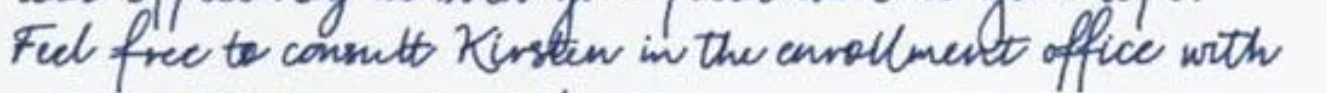

In [11]:
pre_image = displaying_image(img_path)

In [12]:
texts=reading_text(pre_image)
texts

C:\Users\zbook 17 g3\AppData\Roaming\Python\Python39\site-packages\transformers\generation\utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'Feel free to consult Kristen in the enrollment office with'

In [15]:
import cv2
import numpy as np

# Create a blank white image
image = np.ones((400, 1100, 3), dtype=np.uint8) * 255

# Define the text to be added
text =texts

# Choose the font and other properties
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
font_thickness = 3
font_color = (0, 0, 0)  # BGR format

# Get the size of the text box
text_size = cv2.getTextSize(text, font, font_scale, font_thickness)[0]
text_width, text_height = text_size
# Calculate the position to center the text in the image
x = (image.shape[1] - text_width) // 2
y = (image.shape[0] + text_height) // 2

# Add the text to the image
cv2.putText(image, text, (x, y), font, font_scale, font_color, font_thickness)

# Display the image
cv2.imshow('Image with Text', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [10]:
from gtts import gTTS # to turn our text onto voice 
import IPython.display as ipd #to display our generatet voice
tts = gTTS(texts)
tts.save('text _2_ audio.mp3')
audio_path='text _2_ audio.mp3'
ipd.Audio(audio_path, autoplay=True) 

    
    